In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, gc, os, glob
sys.path.append('/Users/earnric/Google Drive/ASU/Codes/PythonCode/modules')
sys.path.append('/Volumes/GoogleDrive/My Drive/ASU/Codes/PythonCode/modules')

import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import NullFormatter
import numpy as np
from IPython import display

from scipy.interpolate import spline
from scipy.optimize import curve_fit

from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import astropy 

import loadSP as lsp

import pandas as pd
import seaborn as sns
# sns.set(color_codes=True)
sns.set(style="whitegrid", font_scale=2, color_codes=True)
sns.set_style({'axes.edgecolor': '0.0','axes.linewidth': 2.0})

plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams.update({'font.size': 28, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
#plt.rcParams['font.size'] = 28

pd.set_option('precision', 5)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
np.set_printoptions(linewidth=170)

In [2]:
def log_formatter(x,pos):
    return format(np.log10(x), '.0f')
logfmt  = FuncFormatter(log_formatter)


nullfmt = NullFormatter()
labelsize = 24

In [3]:
halos_z9_pos, halos_z9_masses, halos_z9_rad = lsp.loadHMHalos(prefix='p3sn/',num=55)

output_00020 z=15.00 
output_00024 z=14.00 
output_00028 z=13.00 
output_00034 z=12.00 
output_00040 z=11.00 
output_00048 z=10.00 
output_00055 z= 9.00 
output_00067 z= 8.00 
output_00076 z= 7.00 


In [4]:
num_to_z = {76:7,67:8,55:9,48:10,40:11,34:12,28:13,24:14,20:15}
sorted(num_to_z.keys())

[20, 24, 28, 34, 40, 48, 55, 67, 76]

In [6]:
# Load the DM halo data into a dict

halos = {}
halos = {num_to_z[i]: (lsp.loadHMHalos(prefix='p3sn/',num=i)) for i in sorted(num_to_z.keys())}

In [7]:
[print("z= {}, mean halo mass={:.3e}".format(i, halos[i][1].mean())) for i in sorted(num_to_z.values())] 

z= 7, mean halo mass=8.165e+07
z= 8, mean halo mass=7.083e+07
z= 9, mean halo mass=6.280e+07
z= 10, mean halo mass=5.741e+07
z= 11, mean halo mass=5.335e+07
z= 12, mean halo mass=4.966e+07
z= 13, mean halo mass=4.721e+07
z= 14, mean halo mass=4.487e+07
z= 15, mean halo mass=4.230e+07


[None, None, None, None, None, None, None, None, None]

In [8]:
sorted(num_to_z.values())

[7, 8, 9, 10, 11, 12, 13, 14, 15]

In [9]:
mbins = np.logspace(7,11,31)
n, bins = np.histogram(halos[7][1],bins=mbins,density=False)
(n/n.sum()).sum()

0.9999999999999999

In [10]:
mbins

array([1.00000000e+07, 1.35935639e+07, 1.84784980e+07, 2.51188643e+07, 3.41454887e+07, 4.64158883e+07, 6.30957344e+07, 8.57695899e+07, 1.16591440e+08, 1.58489319e+08,
       2.15443469e+08, 2.92864456e+08, 3.98107171e+08, 5.41169527e+08, 7.35642254e+08, 1.00000000e+09, 1.35935639e+09, 1.84784980e+09, 2.51188643e+09, 3.41454887e+09,
       4.64158883e+09, 6.30957344e+09, 8.57695899e+09, 1.16591440e+10, 1.58489319e+10, 2.15443469e+10, 2.92864456e+10, 3.98107171e+10, 5.41169527e+10, 7.35642254e+10,
       1.00000000e+11])

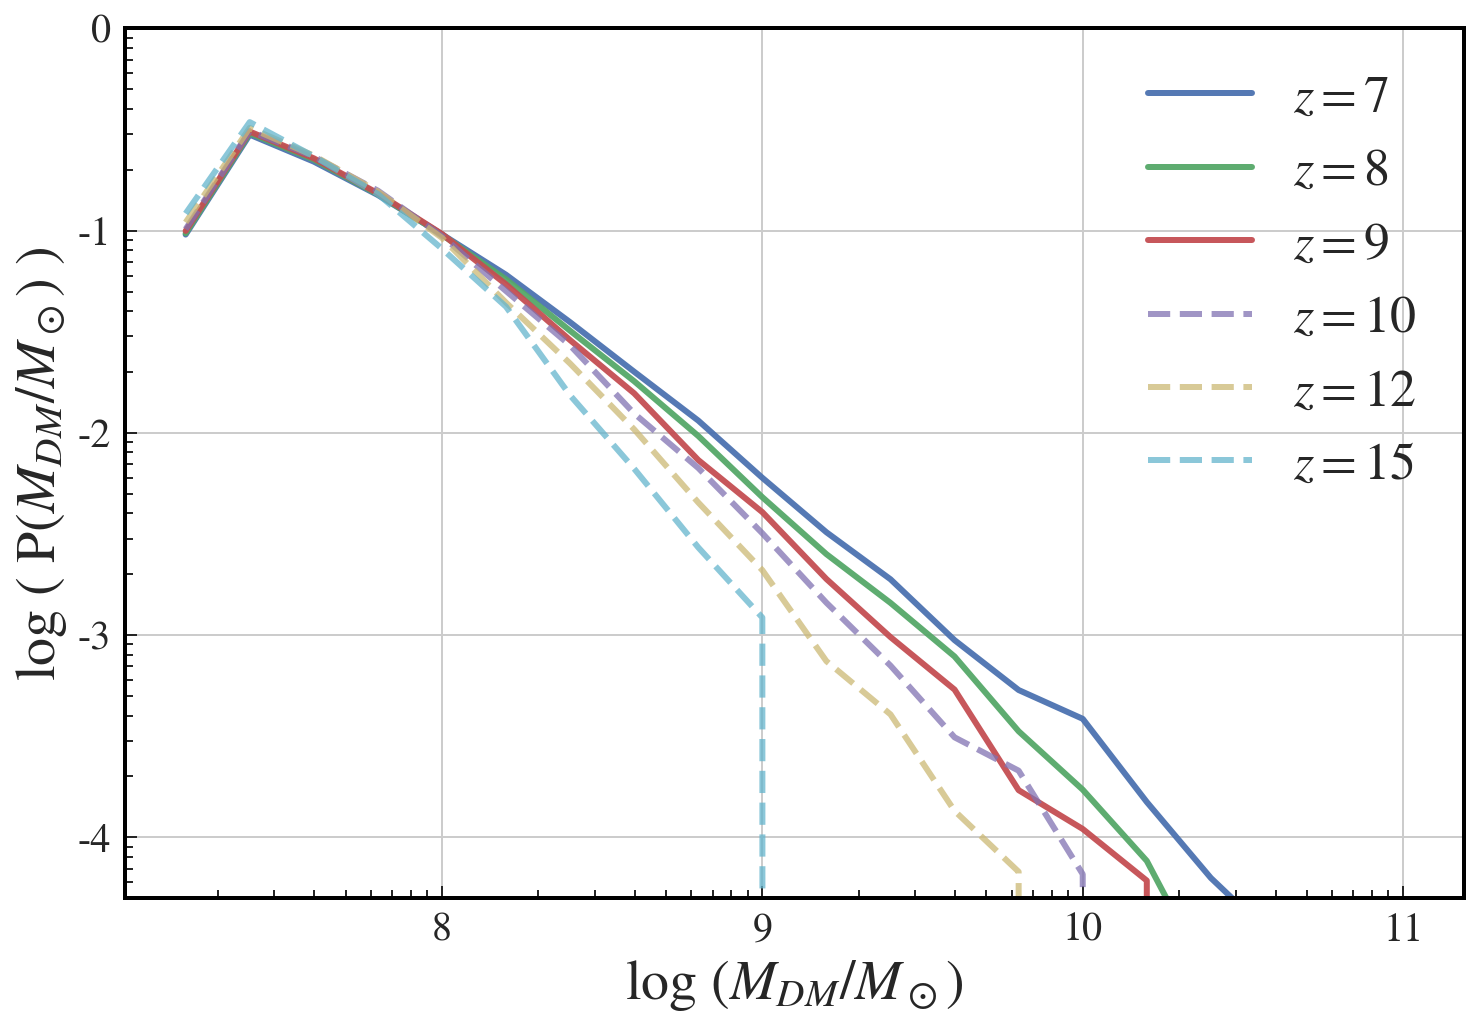

In [11]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

mbins = np.logspace(7,11,21)

colors = ['C0','C1','C2','C3','C4','C4','C5','C5','C5']
for i,c in zip(sorted(num_to_z.values()),colors):
    if i in [11,13,14]:
        continue
    n, bins = np.histogram(halos[i][1],bins=mbins,density=False)
    # Normalize to 1 over entire range... Make PDF
    n = n/n.sum()
    if i >= 10:
        al = 0.75
        ls = '--'
    else:
        al = 0.95
        ls = '-'
    ax.plot(mbins[1:], n, '-', lw=3.0, ls=ls, color=c, alpha=al, label="$z=${}".format(i) )

#     plt.plot([halos[i][1].mean(),halos[i][1].mean()],[1e0,4e4])
ax.set_yscale('log')
ax.set_xscale('log')
ax.yaxis.set_tick_params(which='major',width=1,length=6)
ax.yaxis.set_tick_params(which='minor',width=1,length=4)
ax.yaxis.set_tick_params(which='both', direction='in')
ax.xaxis.set_tick_params(which='major',width=1,length=6)
ax.xaxis.set_tick_params(which='minor',width=1,length=4)
ax.xaxis.set_tick_params(which='both', direction='in')

ax.set_xlabel('log $(M_{DM}/M_\odot)$', fontsize=28)
ax.set_ylabel('log ( P$(M_{DM}/M_\odot)$ )', fontsize=28)
ax.xaxis.set_major_formatter(logfmt)
ax.yaxis.set_major_formatter(logfmt)
ax.set_ylim([5e-5,1])
ax.legend(fontsize=26)
plt.savefig("HMF_p3sn.pdf",dpi=fig.dpi,bbox_inches='tight')

In [12]:
# Return estimated grav binding energy per halo
# based on DM mass and z

# Returns value in units of ***** E_51 *****
def bindingE(m,z):
    return (2.9e53 * (m/1e8)**(5./3.)*(1+z)/10)/1e51

In [13]:
# Define a function that fits a simple 2d poly to the
# mean of the 

the_nums = sorted(num_to_z.keys())
the_zs   = sorted(num_to_z.values())
def redshift_vs_mean(the_zs,a,b,c):
    return (a*(the_zs**2) + b*the_zs + c)

In [14]:
sn_energy = 8e53/1e51 # Based on the SP mass, fraction of SP mass that goes SN and SN energy per 10 M_sun (10^51 erg/10 M_sun)
sn_energy/4.75, 1/4.75

(168.42105263157896, 0.21052631578947367)

In [15]:
[bindingE(halos[i][1].mean(),i) for i in the_zs]

[165.46638590922336,
 146.87699948708007,
 133.5462694087436,
 126.50988450059046,
 122.14054599388597,
 117.3953082845409,
 116.20613787476528,
 114.41092359892262,
 110.60623892561618]

In [16]:
np.array([bindingE(np.median(halos[i][1]),i) for i in the_zs]).min(),np.array([bindingE(np.median(halos[i][1]),i) for i in the_zs]).max()

(32.55384895200648, 50.85724670530477)

In [17]:
np.array([bindingE(np.median(halos[i][1]),i) for i in the_zs])

array([32.55384895, 35.49972996, 38.23306901, 41.3730402 , 43.70858263, 45.42144177, 48.1054574 , 49.82340846, 50.85724671])

[815.56916449  12.53345635 496.36815649 ...   9.17822722  12.53345635   9.78079089]
[  80.98040393 9071.94293799 2098.4015101  ...   28.10595696   16.07434014   12.98147114]
[1103.09754408 2958.54429141  331.82848901 ...   18.53105076   15.45681147   20.15078006]
[ 336.95464304  334.67528787 1736.7599172  ...   13.67408023   12.4162341    17.95080503]
[ 353.91705071 1736.33132989 1124.9784623  ...   15.64666159   45.04476967   20.09385491]
[ 18.35645444  93.56058387 334.41470403 ...  28.57660469 868.76213925  33.74541828]


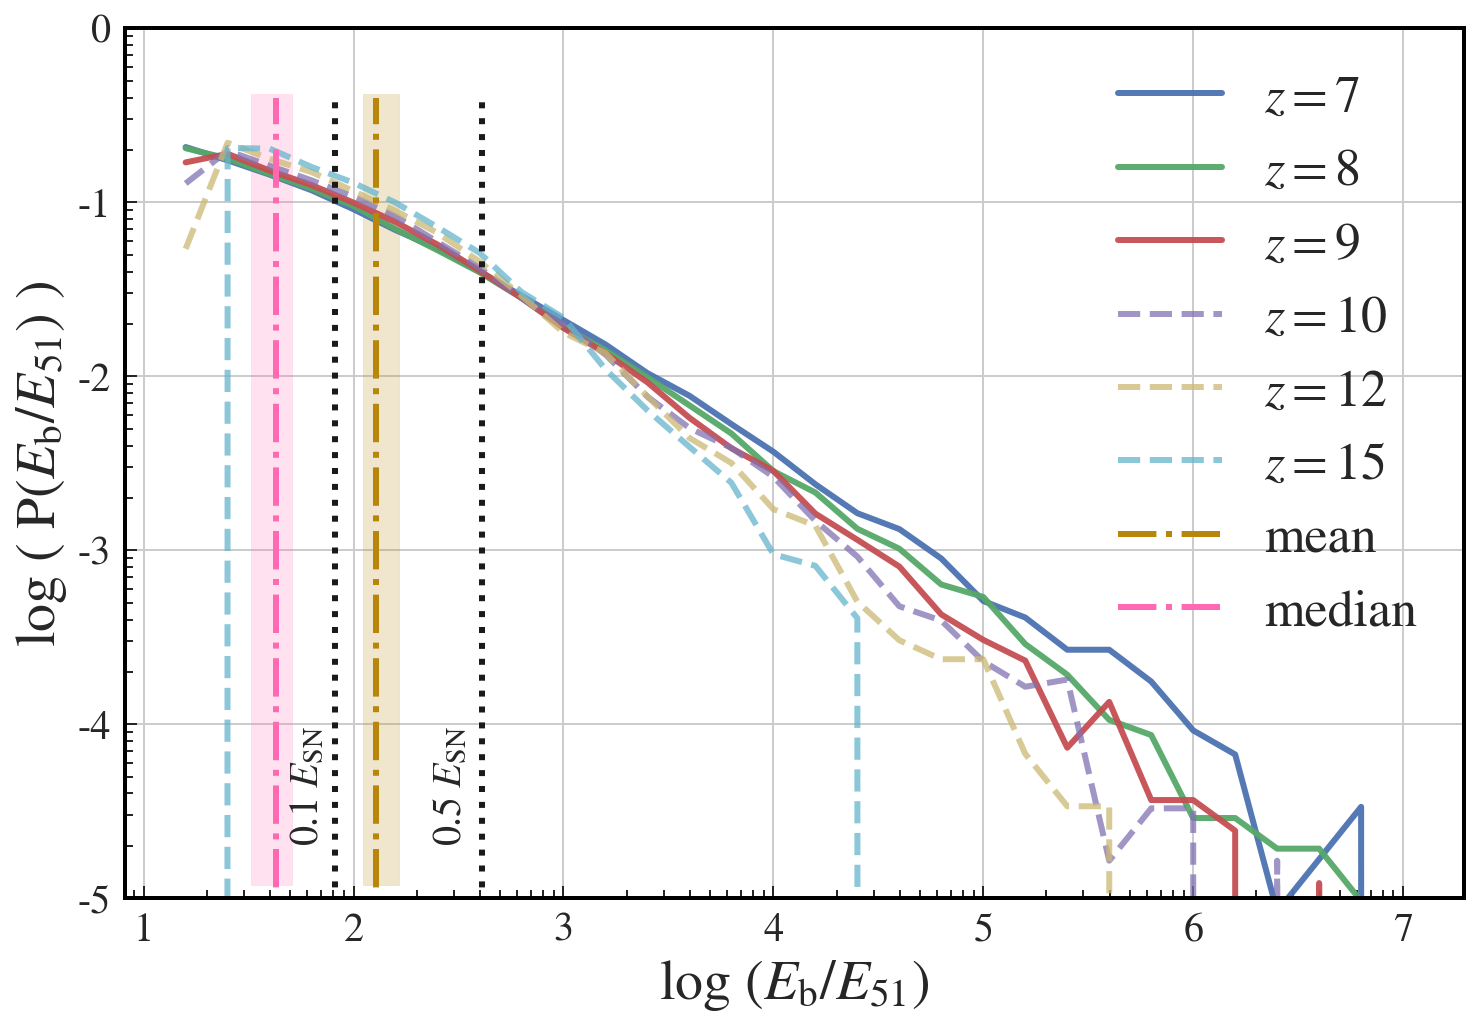

In [18]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

sn_energy = 8.2e53/1e51 # Based on the SP mass, fraction of SP mass that goes SN and SN energy per 10 M_sun (10^51 erg/10 M_sun)

bbins = np.logspace(1,7,31)

colors = ['C0','C1','C2','C3','C4','C4','C5','C5','C5']
for i,c in zip(sorted(num_to_z.values()),colors):
    if i in [11,13,14]:
        continue
    n, bins = np.histogram(bindingE(halos[i][1],i),bins=bbins,density=False)
    # Normalize to 1 over entire range... Make PDF
    n = n/n.sum()
    if i >= 10:
        al = 0.75
        ls = '--'
    else:
        al = 0.95
        ls = '-'
#     ax.plot(bbins[1:], n, '-', drawstyle='steps', lw=3.0, ls=ls, color=c, alpha=al, label="$z=${}".format(i))
    ax.plot(bbins[1:], n, '-', lw=3.0, ls=ls, color=c, alpha=al, label="$z=${}".format(i))

    print(bindingE(halos[i][1],i))
ax.plot([sn_energy/10.0,sn_energy/10.0],[5e-6,.4],lw = 3, ls=":", c='k')
ax.annotate(r'$0.1\; {E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (sn_energy/10.0 - sn_energy/25,2e-5), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom', rotation=90, fontsize=20)
    
ax.plot([sn_energy/2.0,sn_energy/2.0],[5e-6,.4],lw = 3, ls=":", c='k')
ax.annotate(r'$0.5\; {E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (sn_energy/2.0 - sn_energy/4.7,2e-5), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom', rotation=90, fontsize=20)

# ax.plot([sn_energy,sn_energy],[5e-6,.4],lw = 3, ls=":", c='k')
# ax.annotate(r'     ${E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (sn_energy - sn_energy/2.5,2e-5), xycoords='figure fraction',
#             textcoords = 'data', ha = 'left', va = 'bottom', rotation=90, fontsize=20)

# Mean mean and median binding energies (across all zs)
mean_Eb = np.array([bindingE(halos[i][1].mean(),i) for i in the_zs]).mean()
median_Eb = np.array([bindingE(np.median(halos[i][1]),i) for i in the_zs]).mean()

low_Mean_Eb = np.array([bindingE(halos[i][1].mean(),i) for i in the_zs]).min()
hi_Mean_Eb  = np.array([bindingE(halos[i][1].mean(),i) for i in the_zs]).max()

low_Med_Eb = np.array([bindingE(np.median(halos[i][1]),i) for i in the_zs]).min()
hi_Med_Eb  = np.array([bindingE(np.median(halos[i][1]),i) for i in the_zs]).max()


ax.plot([mean_Eb,mean_Eb],[5e-6,.4], ls='-.', lw=3, c='darkgoldenrod',
         label=r'mean')
ax.axvspan(low_Mean_Eb,hi_Mean_Eb, ymin=0.015, ymax=0.925, alpha=0.20, color='darkgoldenrod')
ax.plot([median_Eb, median_Eb], [5e-6,.4], lw=3, ls='-.', c='hotpink',
         label=r'median')
ax.axvspan(low_Med_Eb,hi_Med_Eb, ymin=0.015, ymax=0.925, alpha=0.20, color='hotpink')

#     plt.plot([halos[i][1].mean(),halos[i][1].mean()],[1e0,4e4])
ax.set_yscale('log')
ax.set_xscale('log')
ax.yaxis.set_tick_params(which='major',width=1,length=6)
ax.yaxis.set_tick_params(which='minor',width=1,length=4)
ax.yaxis.set_tick_params(which='both', direction='in')
ax.xaxis.set_tick_params(which='major',width=1,length=6)
ax.xaxis.set_tick_params(which='minor',width=1,length=4)
ax.xaxis.set_tick_params(which='both', direction='in')

ax.set_xlabel('log $(E_{\mathrm {b}}/E_{\mathrm{51}})$', fontsize=28)
ax.set_ylabel('log ( P$(E_{\mathrm {b}}/E_{\mathrm{51}})$ )', fontsize=28)
ax.xaxis.set_major_formatter(logfmt)
ax.yaxis.set_major_formatter(logfmt)
ax.set_ylim([1e-5,1])
ax.legend(fontsize=26)
plt.savefig("Ebinding2_p3sn.pdf",dpi=fig.dpi,bbox_inches='tight')

In [19]:
mean_Eb/ (sn_energy/10.0), sn_energy

(1.5625456558040223, 820.0)

In [20]:
median_Eb,mean_Eb, 0.16 * sn_energy, .21*800

(42.84175834260998, 128.12874377592982, 131.2, 168.0)

In [25]:
# Find fits to the data for the mean mass and the median mass as a function of z
# Need to reverse the numerical indicates when accessing halos since high nums matchup with low redshift
coef_mean, pcov = curve_fit(redshift_vs_mean, sorted(num_to_z.values()), [halos[i][1].mean() for i in sorted(num_to_z.values())])
coef_median, pcov = curve_fit(redshift_vs_mean, sorted(num_to_z.values()), [np.median(halos[i][1]) for i in sorted(num_to_z.values())])

In [21]:
sn_energy/10.

82.0

In [22]:
bindingE(5.3e7,7),bindingE(3.5e7,15),

(80.52815844482261, 80.65501713639661)

In [23]:
the_zs,[bindingE(np.median(halos[i][1]),i) for i in the_zs]

([7, 8, 9, 10, 11, 12, 13, 14, 15],
 [32.55384895200648,
  35.499729959348,
  38.23306901215138,
  41.37304019616067,
  43.708582631042006,
  45.42144177407752,
  48.1054573950082,
  49.82340845839076,
  50.85724670530477])

In [168]:
bindingE(8.20e+07,7),bindingE(3.09e+07,7)

(166.66499957042058, 32.765649704746956)

In [214]:
[bindingE(halos[i][1].min(),i) for i in the_zs], np.log10([bindingE(halos[i][1].max(),i) for i in the_zs])

([8.8827167316315965,
  9.9930563230855469,
  11.103395914539497,
  12.213735505993444,
  13.324075097447393,
  14.434414688901345,
  15.544754280355292,
  16.655093871809243,
  17.765433463263193],
 array([ 6.74562509,  6.61839559,  6.57535433,  6.29856359,  5.82240595,  5.46752242,  5.10004928,  4.53694374,  4.29182393]))

In [215]:
the_nums, the_zs

([13, 15, 18, 21, 25, 30, 35, 44, 56], [7, 8, 9, 10, 11, 12, 13, 14, 15])

/Users/earnric/anaconda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(127320, 7) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/anaconda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(104661, 8) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/anaconda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(81823, 9) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/anaconda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(60865, 10) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/anaconda/envs/

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Largest bin value: -0.464, smallest -4.912875398647574


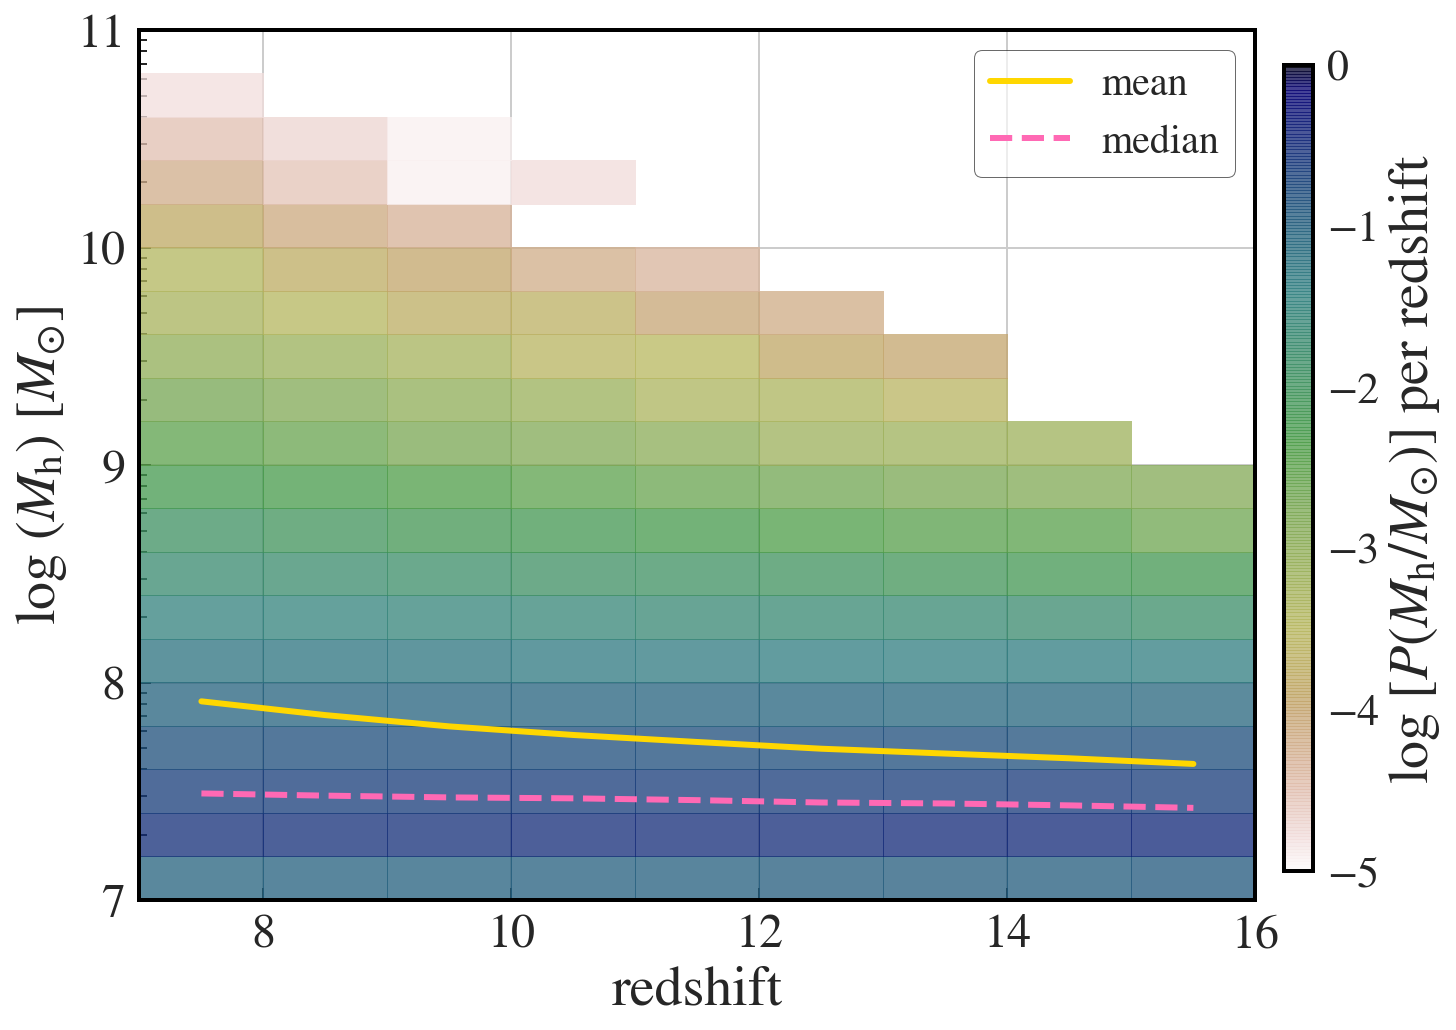

In [191]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes()

sn_energy = 8e53/1e51

the_zs   = sorted(num_to_z.values())
massBins = np.logspace(7,11,21)
zBins    = np.linspace(7,16,10)

data      = np.concatenate([halos[i][1].flatten() for i in the_zs],0)
redshifts = np.concatenate([np.full(len(halos[i][1]),i).flatten() for i in the_zs])

nTempA, binsx, binsy = np.histogram2d(data,redshifts,bins=[massBins,zBins],normed=False)

X, Y = np.meshgrid(zBins, massBins)  # Create a grid over the range of bins for the plot

# Mask out 0 values before taking log10... 
H = np.ma.masked_where(nTempA==0.0, nTempA)
for i in range(len(H[0,:])):     # Column index i, over len of row 0
    colTot = np.sum(H[:,i])
    for j in range(len(H[:,0])): # Row index j, over len of column 0
        H[:,i][j] = H[:,i][j]/colTot
    print(np.sum(H[:,i]))
H = np.log10(H)        # Take log of counts, we've already normalized by volume and area
print("Largest bin value: {:.3f}, smallest {}".format(H.max(),H.min()))
# Create the plot
im = (ax.pcolormesh(X, Y, H, cmap=mpl.cm.gist_earth_r, vmin=-5, vmax=0, alpha=0.75) )
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)

cbar.ax.tick_params(labelsize=22) 
#cbar.ax.set_yticklabels(['1', '2', '4', '6', '10', maxCV], size=24)
cbar.set_label(r"log $\left[P(M_{\mathrm{h}}/M_{\odot})\right]$ per redshift",fontsize=28)

ax.plot(np.array(the_zs)+.5,[halos[i][1].mean() for i in the_zs], lw=3, ls='-', c='gold',
        label='mean')
ax.plot(np.array(the_zs)+.5,[np.median(halos[i][1]) for i in the_zs], lw=3, ls='--', c='hotpink',
        label='median')

ax.set_yscale('log')
ax.yaxis.set_major_formatter(logfmt)
ax.yaxis.set_tick_params(which='major',width=1,length=6)
ax.yaxis.set_tick_params(which='minor',width=1,length=4)
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.xaxis.set_tick_params(which='major',width=1,length=6)
ax.xaxis.set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(labelsize=24)
ax.get_yaxis().set_tick_params(labelsize=24)
ax.grid()
# ax.set_yticks([1e7,1e8])
# ax.set_yticklabels([7,7.3,8])

ax.set_xlabel('redshift',fontsize=28)
ax.set_ylabel('log ($M_{\mathrm{h}}$) [$M_{\odot}$]',fontsize=28)


lk = ax.legend(loc=0,framealpha=0.65, fancybox=True, edgecolor='k')
lk.get_frame().set_linewidth(0.5)
lk.set_frame_on(True)

plt.savefig("HMR_DM-2d.pdf".format(dir),dpi=fig.dpi,bbox_inches='tight')

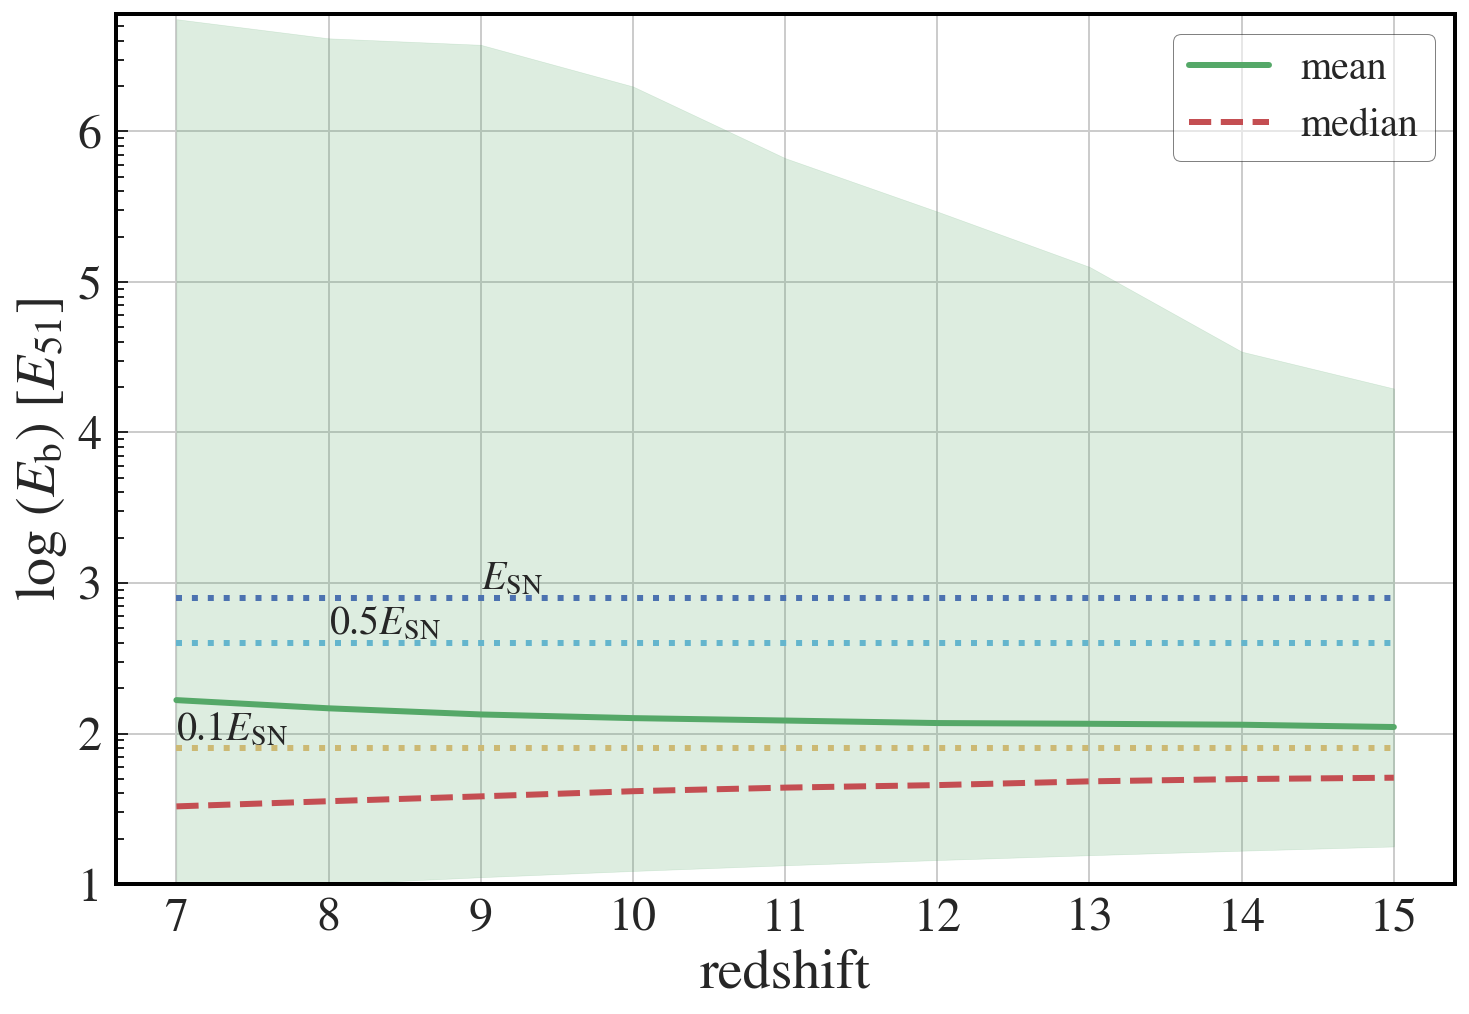

In [169]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

sn_energy = 8e53/1e51

the_zs   = sorted(num_to_z.values())

ax.set_yscale('log')
ax.yaxis.set_tick_params(which='major',width=1,length=6)
ax.yaxis.set_tick_params(which='minor',width=1,length=4)
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(labelsize=24)
ax.get_yaxis().set_tick_params(labelsize=24)
ax.plot(the_zs,[bindingE(halos[i][1].mean(),i) for i in the_zs], lw=3, c='C1',
         label=r'mean')
ax.plot(the_zs,[bindingE(np.median(halos[i][1]),i) for i in the_zs], lw=3, ls='--', c='C2',
         label=r'median')
ax.fill_between(the_zs,
                 [bindingE(halos[i][1].min(),i) for i in the_zs],
                 [bindingE(halos[i][1].max(),i) for i in the_zs],  color='C1', alpha = 0.2)
# Add lines for typical SN energy
ax.plot(the_zs,np.full(len(num_to_z.keys()),sn_energy/10.0),lw = 3, ls=":", c='C4')
ax.annotate(r'$0.1 {E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (7, sn_energy/10.0), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
ax.plot(the_zs,np.full(len(num_to_z.keys()),sn_energy/2.0),lw = 3, ls=":", c='C5')
ax.annotate(r'$0.5 {E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (8, sn_energy/2.0), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
ax.plot(the_zs,np.full(len(num_to_z.keys()),sn_energy),lw = 3, ls=":", c='C6')
ax.annotate(r'${E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (9, sn_energy), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
# ax.set_ylim([30,200])
ax.set_ylim([10,6e6])
# ax.set_yticklabels([40,60,80,100])
ax.yaxis.set_major_formatter(logfmt)
# ax.yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(logfmt)
# ax.yaxis.set_minor_formatter(logfmt)
ax.set_ylabel('log ($E_{\mathrm {b}}$) [$E_{\mathrm{51}}$]',fontsize=28)
ax.set_xlabel('redshift',fontsize=28)

lk = ax.legend(loc=0,framealpha=0.55, fancybox=True, edgecolor='k')
# lk = ax.legend(loc=1,framealpha=0.55, fancybox=True, edgecolor='k')
lk.get_frame().set_linewidth(0.5)
lk.set_frame_on(True)

plt.savefig("Ebinding.pdf".format(dir),dpi=fig.dpi,bbox_inches='tight')

In [153]:
data,redshifts,nTempA

(array([ 834.58105327,  503.04281575,  726.45434595, ...,   32.61471679,   61.65507342,   58.27811017]),
 array([  7.,   7.,   7., ...,  15.,  15.,  15.]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 

/Users/earnric/anaconda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(127320, 7) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/anaconda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(104661, 8) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/anaconda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(81823, 9) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/anaconda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(60865, 10) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/anaconda/envs/

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Largest bin value: -0.632, smallest -5.077640389544002


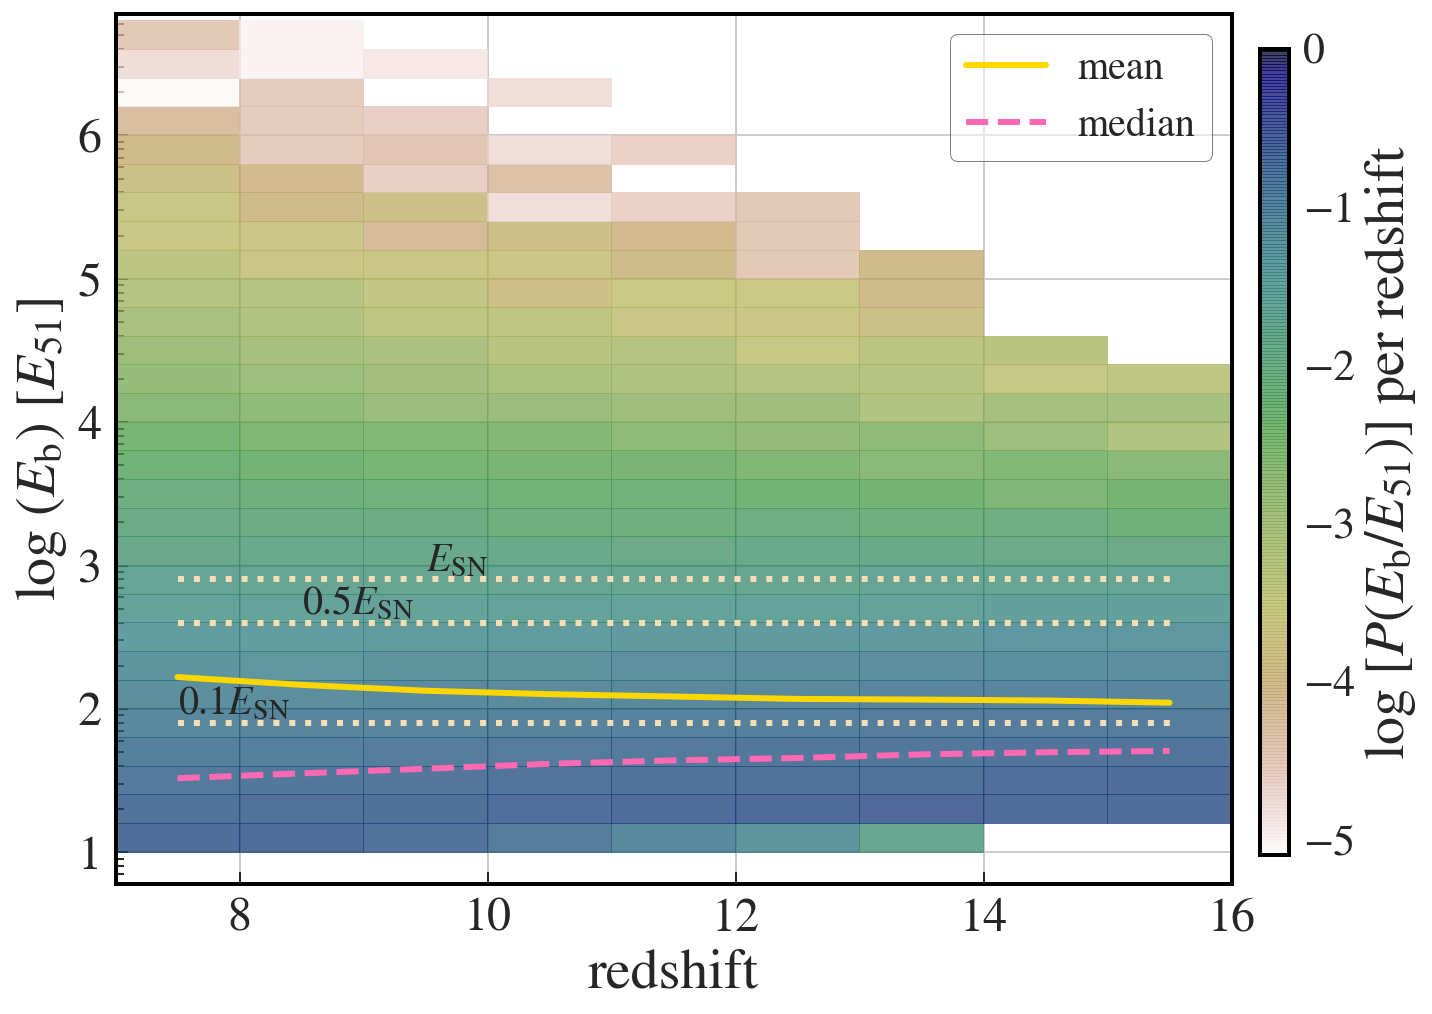

In [190]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes()

sn_energy = 8e53/1e51

the_zs   = sorted(num_to_z.values())
massBins = np.logspace(1,7,31)
zBins    = np.linspace(7,16,10)

data      = np.concatenate([bindingE(halos[i][1],i).flatten() for i in the_zs],0)
redshifts = np.concatenate([np.full(len(halos[i][1]),i).flatten() for i in the_zs])

nTempA, binsx, binsy = np.histogram2d(data,redshifts,bins=[massBins,zBins],normed=False)

X, Y = np.meshgrid(zBins, massBins)  # Create a grid over the range of bins for the plot

# Mask out 0 values before taking log10... 
H = np.ma.masked_where(nTempA==0.0, nTempA)
for i in range(len(H[0,:])):     # Column index i, over len of row 0
    colTot = np.sum(H[:,i])
    for j in range(len(H[:,0])): # Row index j, over len of column 0
        H[:,i][j] = H[:,i][j]/colTot
    print(np.sum(H[:,i]))
H = np.log10(H)        # Take log of counts, we've already normalized by volume and area
print("Largest bin value: {:.3f}, smallest {}".format(H.max(),H.min()))
# Create the plot
im = (ax.pcolormesh(X, Y, H, cmap=mpl.cm.gist_earth_r, vmin=-5.1, vmax=0, alpha=0.75) )
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)

cbar.ax.tick_params(labelsize=22) 
#cbar.ax.set_yticklabels(['1', '2', '4', '6', '10', maxCV], size=24)
cbar.set_label(r"log $\left[P(E_{\mathrm{b}}/E_{\mathrm{51}})\right]$ per redshift",fontsize=28)

# Add lines for typical SN energy
ax.plot(np.array(the_zs)+0.5,np.full(len(num_to_z.keys()),sn_energy/10.0),lw = 3, ls=":", c='wheat')
ax.annotate(r'$0.1 {E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (7.5, sn_energy/10.0), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
ax.plot(np.array(the_zs)+0.5,np.full(len(num_to_z.keys()),sn_energy/2.0),lw = 3, ls=":", c='wheat')
ax.annotate(r'$0.5 {E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (8.5, sn_energy/2.0), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
ax.plot(np.array(the_zs)+0.5,np.full(len(num_to_z.keys()),sn_energy),lw = 3, ls=":", c='wheat')
ax.annotate(r'${E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (9.5, sn_energy), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)

ax.plot(np.array(the_zs)+0.5,[bindingE(halos[i][1].mean(),i) for i in the_zs], lw=3, c='gold',
         label=r'mean')
ax.plot(np.array(the_zs)+0.5,[bindingE(np.median(halos[i][1]),i) for i in the_zs], lw=3, ls='--', c='hotpink',
         label=r'median')

ax.yaxis.set_tick_params(which='major',width=1,length=6)
ax.yaxis.set_tick_params(which='minor',width=1,length=4)
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.xaxis.set_tick_params(which='major',width=1,length=6)
ax.xaxis.set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(labelsize=24)
ax.get_yaxis().set_tick_params(labelsize=24)
ax.set_yscale('log')
ax.set_ylim([6,7e6])
ax.grid()

# ax.set_yticklabels([40,60,80,100])
ax.yaxis.set_major_formatter(logfmt)
# ax.yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(logfmt)
# ax.yaxis.set_minor_formatter(logfmt)
ax.set_ylabel('log ($E_{\mathrm {b}}$) [$E_{\mathrm{51}}$]',fontsize=28)
ax.set_xlabel('redshift',fontsize=28)

lk = ax.legend(loc=0,framealpha=0.55, fancybox=True, edgecolor='k')
# lk = ax.legend(loc=1,framealpha=0.55, fancybox=True, edgecolor='k')
lk.get_frame().set_linewidth(0.5)
lk.set_frame_on(True)


plt.savefig("Ebinding-2d.pdf".format(dir),dpi=fig.dpi,bbox_inches='tight')

In [192]:
# Binding energy of halo median mass
[bindingE(np.median(halos[i][1]),i) for i in the_zs]

[32.801003230503753,
 35.499729959348002,
 38.233069012151383,
 41.373040196160673,
 43.708582631042006,
 45.421441774077522,
 48.105457395008202,
 49.823408458390759,
 50.857246705304767]

In [195]:
# Median of binding energy of all halo mass
[np.median(bindingE(halos[i][1],i)) for i in the_zs]

[32.801003230503753,
 35.499729959348002,
 38.233069012151383,
 41.373040196160673,
 43.708582631042006,
 45.421441774077522,
 48.105457395008202,
 49.823408458390759,
 50.857246705304767]

In [202]:
#
np.array([halos[i][1][halos[i][1] < sn_energy/10.0] for i in the_zs])

array([], shape=(9, 0), dtype=float64)

In [199]:
sn_energy/10.0

80.0

In [26]:
# Fraction of halos, by number, that have less binding energy than 1/10 SN energy
fracsUnbound = np.array([bindingE(halos[i][1],i)[bindingE(halos[i][1],i) < sn_energy/10.0].size /  \
         bindingE(halos[i][1],i).size for i in the_zs])
print(fracsUnbound)
fracsUnbound.mean()

[ 0.71164782  0.70364319  0.69228701  0.68078534  0.67391003  0.66247719  0.65342267  0.64844659  0.63939764]


0.67400194237947852

In [28]:
# Mass fraction of halos, by number, that have less binding energy than 1/10 SN energy
massFracsUnbound = np.array([halos[i][1][bindingE(halos[i][1],i) < sn_energy/10.0].sum() /  \
 halos[i][1].sum() for i in the_zs])
print(massFracsUnbound)
massFracsUnbound.mean()

[ 0.22915425  0.2545266   0.27363222  0.28744412  0.29967293  0.30648321  0.31236002  0.31937751  0.32446025]


0.28967901110601246

/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(127320, 7) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(104661, 8) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(81823, 9) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(60865, 10) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/Users/earnric/.conda/envs/py3k/lib/p

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Largest bin value: -0.632, smallest -5.077640389544002


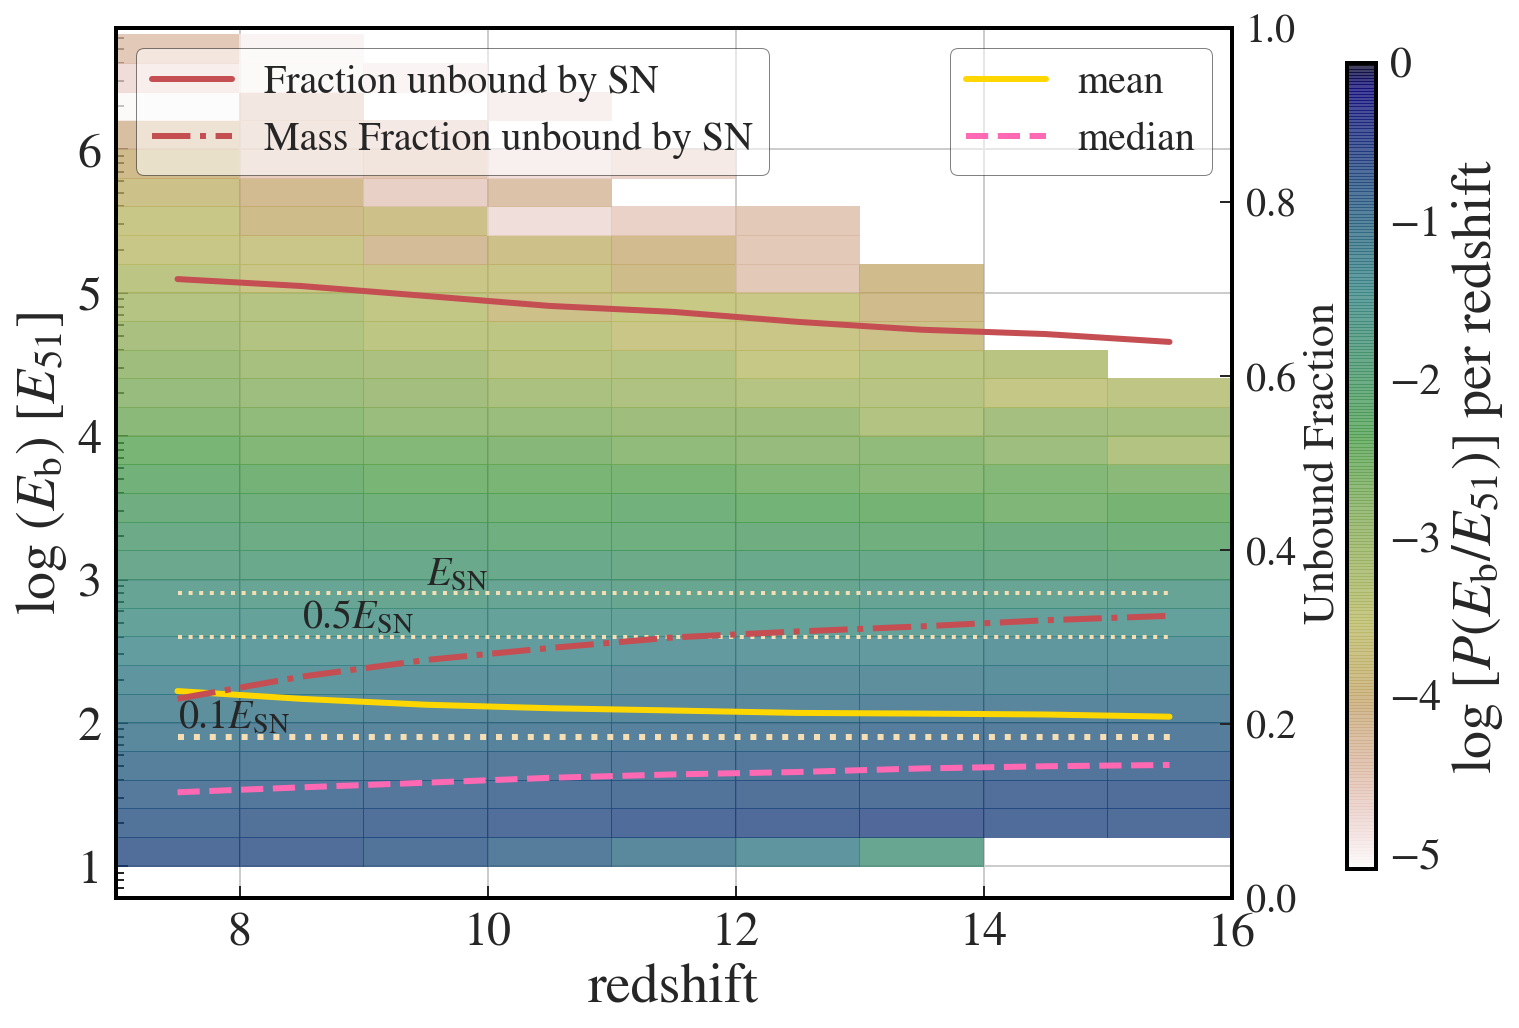

In [29]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes()

sn_energy = 8e53/1e51

the_zs   = sorted(num_to_z.values())
massBins = np.logspace(1,7,31)
zBins    = np.linspace(7,16,10)

data      = np.concatenate([bindingE(halos[i][1],i).flatten() for i in the_zs],0)
redshifts = np.concatenate([np.full(len(halos[i][1]),i).flatten() for i in the_zs])

nTempA, binsx, binsy = np.histogram2d(data,redshifts,bins=[massBins,zBins],normed=False)

X, Y = np.meshgrid(zBins, massBins)  # Create a grid over the range of bins for the plot

# Mask out 0 values before taking log10... 
H = np.ma.masked_where(nTempA==0.0, nTempA)
for i in range(len(H[0,:])):     # Column index i, over len of row 0
    colTot = np.sum(H[:,i])
    for j in range(len(H[:,0])): # Row index j, over len of column 0
        H[:,i][j] = H[:,i][j]/colTot
    print(np.sum(H[:,i]))
H = np.log10(H)        # Take log of counts, we've already normalized by volume and area
print("Largest bin value: {:.3f}, smallest {}".format(H.max(),H.min()))
# Create the plot
im = (ax.pcolormesh(X, Y, H, cmap=mpl.cm.gist_earth_r, vmin=-5.1, vmax=0, alpha=0.75) )
cbar_ax = fig.add_axes([0.98, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)

cbar.ax.tick_params(labelsize=22) 
#cbar.ax.set_yticklabels(['1', '2', '4', '6', '10', maxCV], size=24)
cbar.set_label(r"log $\left[P(E_{\mathrm{b}}/E_{\mathrm{51}})\right]$ per redshift",fontsize=28)

# Add lines for typical SN energy
ax.plot(np.array(the_zs)+0.5,np.full(len(num_to_z.keys()),sn_energy/10.0),lw = 3, ls=":", c='wheat')
ax.annotate(r'$0.1 {E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (7.5, sn_energy/10.0), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
ax.plot(np.array(the_zs)+0.5,np.full(len(num_to_z.keys()),sn_energy/2.0),lw = 2, ls=":", c='wheat')
ax.annotate(r'$0.5 {E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (8.5, sn_energy/2.0), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
ax.plot(np.array(the_zs)+0.5,np.full(len(num_to_z.keys()),sn_energy),lw = 2, ls=":", c='wheat')
ax.annotate(r'${E_{\mathrm{SN}}}$', xy = (0.5, 0.5), xytext = (9.5, sn_energy), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)

ax.plot(np.array(the_zs)+0.5,[bindingE(halos[i][1].mean(),i) for i in the_zs], lw=3, c='gold',
         label=r'mean')
ax.plot(np.array(the_zs)+0.5,[bindingE(np.median(halos[i][1]),i) for i in the_zs], lw=3, ls='--', c='hotpink',
         label=r'median')

ax.yaxis.set_tick_params(which='major',width=1,length=6)
ax.yaxis.set_tick_params(which='minor',width=1,length=4)
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.xaxis.set_tick_params(which='major',width=1,length=6)
ax.xaxis.set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(labelsize=24)
ax.get_yaxis().set_tick_params(labelsize=24)
ax.set_yscale('log')
ax.set_xlim([7,16])
ax.set_ylim([6,7e6])

# ax.set_yticklabels([40,60,80,100])
ax.yaxis.set_major_formatter(logfmt)
# ax.yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(logfmt)
# ax.yaxis.set_minor_formatter(logfmt)
ax.set_ylabel('log ($E_{\mathrm {b}}$) [$E_{\mathrm{51}}$]',fontsize=28)
ax.set_xlabel('redshift',fontsize=28)
ax.grid()


ax2 = ax.twinx() # Use the same x axis
ax2.set_yscale('linear')
ax2.yaxis.set_tick_params(which='major',width=1,length=6)
ax2.get_yaxis().set_tick_params(which='both', direction='in')
ax2.get_xaxis().set_tick_params(labelsize=24)
ax2.plot(np.array(the_zs)+0.5,fracsUnbound, lw=3, c='C2',
         label=r'Fraction unbound by SN')
ax2.plot(np.array(the_zs)+0.5,massFracsUnbound, lw=3, c='C2', ls='-.',
         label=r'Mass Fraction unbound by SN')
ax2.set_ylim([0,1])
# ax2.yaxis.set_minor_formatter(logfmt)
ax2.set_ylabel('Unbound Fraction')
ax2.grid(False)


lk = ax.legend(loc=1,framealpha=0.55, fancybox=True, edgecolor='k')
# lk = ax.legend(loc=1,framealpha=0.55, fancybox=True, edgecolor='k')
lk.get_frame().set_linewidth(0.5)
lk.set_frame_on(True)

lk2= ax2.legend(loc=2,framealpha=0.55, fancybox=True, edgecolor='k')
lk2.get_frame().set_linewidth(0.5)
lk2.set_frame_on(True)

plt.savefig("Ebinding-2d2.pdf".format(dir),dpi=fig.dpi,bbox_inches='tight')